# Reading and Understanding Data

#Import Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

## Import Data Set

In [ ]:
df =pd.read_csv("/content/drive/MyDrive/LSP PROJECT/USA_Housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
#Mengubah nama kolom
df.rename(columns={'Avg. Area Income': 'Area Income', 'Avg. Area House Age' : 'House Age', 'Avg. Area Number of Rooms' : 'Area Number of Rooms', 'Avg. Area Number of Bedrooms' : 'Area Number of Bedrooms'}, inplace=True)

In [ ]:
#Info Data
df.shape

(5000, 7)

In [ ]:
#Info Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area Income              5000 non-null   float64
 1   House Age                5000 non-null   float64
 2   Area Number of Rooms     5000 non-null   float64
 3   Area Number of Bedrooms  5000 non-null   float64
 4   Area Population          5000 non-null   float64
 5   Price                    5000 non-null   float64
 6   Address                  5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
a_clean = df.copy(deep = True)

In [ ]:
df.info

<bound method DataFrame.info of       Area Income  House Age  Area Number of Rooms  Area Number of Bedrooms  \
0     79545.45857   5.682861              7.009188                     4.09   
1     79248.64245   6.002900              6.730821                     3.09   
2     61287.06718   5.865890              8.512727                     5.13   
3     63345.24005   7.188236              5.586729                     3.26   
4     59982.19723   5.040555              7.839388                     4.23   
...           ...        ...                   ...                      ...   
4995  60567.94414   7.830362              6.137356                     3.46   
4996  78491.27543   6.999135              6.576763                     4.02   
4997  63390.68689   7.250591              4.805081                     2.13   
4998  68001.33124   5.534388              7.130144                     5.44   
4999  65510.58180   5.992305              6.792336                     4.07   

      Area Populati

In [ ]:
df.shape

(5000, 7)

In [ ]:
df.isnull().sum()

Area Income                0
House Age                  0
Area Number of Rooms       0
Area Number of Bedrooms    0
Area Population            0
Price                      0
Address                    0
dtype: int64

In [ ]:
# melihat info statistikal data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area Income,5000.0,6.858311e+04,10657.991214,17796.631190,61480.562390,6.880429e+04,7.578334e+04,1.077017e+05
House Age,5000.0,5.977222e+00,0.991456,2.644304,5.322283,5.970429e+00,6.650808e+00,9.519088e+00
Area Number of Rooms,5000.0,6.987792e+00,1.005833,3.236194,6.299250,7.002902e+00,7.665871e+00,1.075959e+01
Area Number of Bedrooms,5000.0,3.981330e+00,1.234137,2.000000,3.140000,4.050000e+00,4.490000e+00,6.500000e+00
Area Population,5000.0,3.616352e+04,9925.650114,172.610686,29403.928700,3.619941e+04,4.286129e+04,6.962171e+04
Price,5000.0,1.232073e+06,353117.626584,15938.657920,997577.135075,1.232669e+06,1.471210e+06,2.469066e+06


In [ ]:
df.corr()

,Area Income,House Age,Area Number of Rooms,Area Number of Bedrooms,Area Population,Price
Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


# Cleaning Data

In [ ]:
a_clean = df.copy(deep = True)

Check type data for Integer and Float

In [ ]:
print (df.dtypes)

Area Income                float64
House Age                  float64
Area Number of Rooms       float64
Area Number of Bedrooms    float64
Area Population            float64
Price                      float64
Address                     object
dtype: object


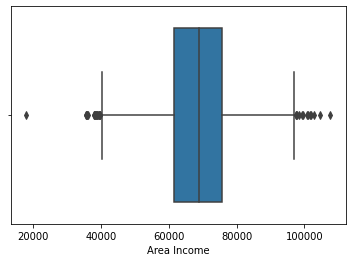

In [ ]:
box1 = sns.boxplot(x = 'Area Income', data = a_clean)

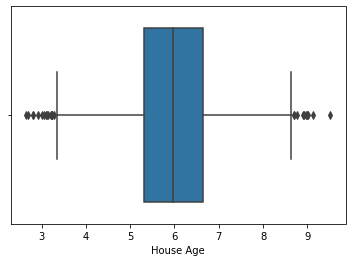

In [ ]:
box1 = sns.boxplot(x = 'House Age', data = a_clean)

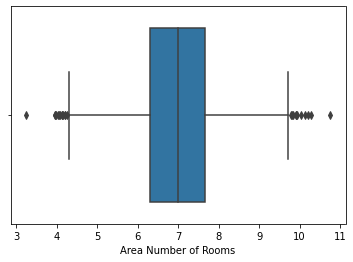

In [ ]:
box1 = sns.boxplot(x = 'Area Number of Rooms', data = a_clean)

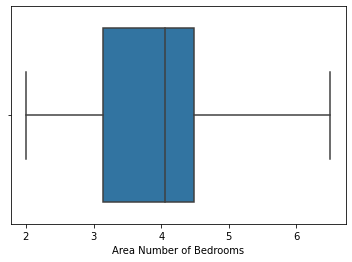

In [ ]:
box1 = sns.boxplot(x = 'Area Number of Bedrooms', data = a_clean)

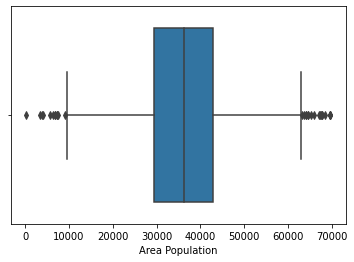

In [ ]:
box1 = sns.boxplot(x = 'Area Population', data = a_clean)

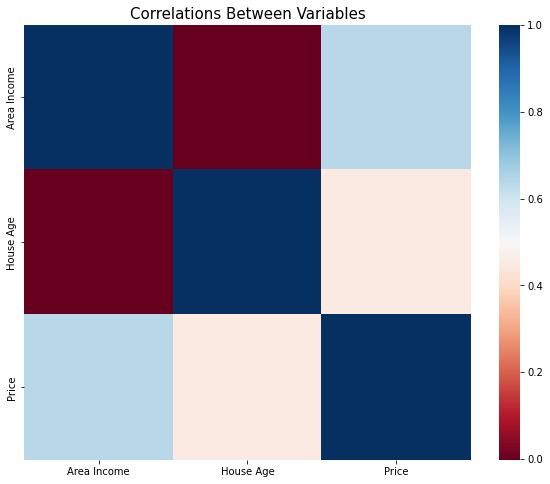

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

In [ ]:
important_num_cols = list(df.corr()["Price"][(df.corr()["Price"]>0.50) | (df.corr()["Price"]<-0.50)].index)
cat_cols = ["Area Income","House Age","Area Number of Rooms","Area Number of Bedrooms","Area Population"]
important_cols = important_num_cols + cat_cols
df = df[important_cols]

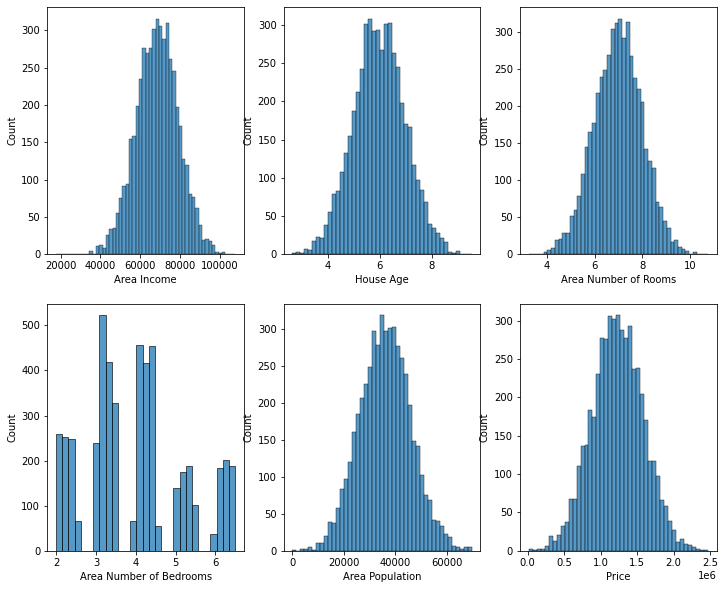

In [ ]:
fig, axes = plt.subplots(figsize = (12,10), nrows = 2, ncols = 3)
sns.histplot(a_clean["Area Income"], ax = axes[0,0])
sns.histplot(a_clean["House Age"], ax = axes[0,1])
sns.histplot(a_clean["Area Number of Rooms"], ax = axes[0,2])
sns.histplot(a_clean["Area Number of Bedrooms"], ax = axes[1,0])
sns.histplot(a_clean["Area Population"], ax = axes[1,1])
sns.histplot(a_clean["Price"], ax = axes[1,2])
plt.show()

#Visualisasi Data

## Exploratory Data Analysis

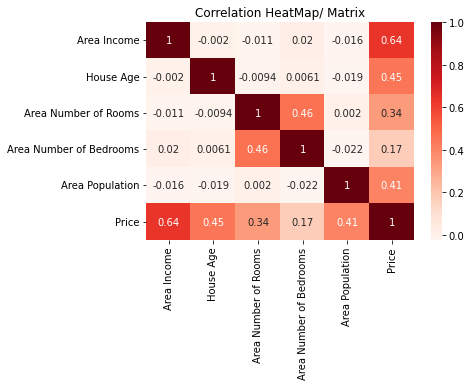

In [ ]:
sns.heatmap(a_clean.corr(), cmap ="Reds", annot = True)
plt.title("Correlation HeatMap/ Matrix")
plt.show()

visualisasi di antara korelasi dan variabel numeric

In [ ]:
print("Missing Values by Column")
print("-"*30)
print(df.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",df.isna().sum().sum())

Missing Values by Column
------------------------------
Area Income                0
House Age                  0
Area Number of Rooms       0
Area Number of Bedrooms    0
Area Population            0
Price                      0
Address                    0
dtype: int64
------------------------------
TOTAL MISSING VALUES: 0


Skewness: -0.002718
Kurtosis: -0.054918


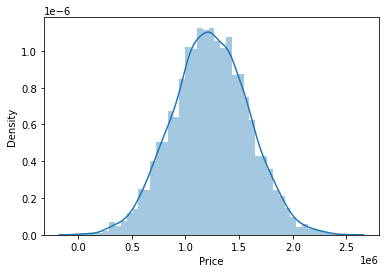

In [ ]:
# Histogram Target Variabel
# Nilai skewness (ukuran kemiringan) menunjukkan data normal ketika nilai-nilai tersebut berada di antara rentang nilai -2 sampai dengan 2
sns.distplot(df['Price'])
print("Skewness: %f" % df['Price'].skew())
print("Kurtosis: %f" % df['Price'].kurt())

Data Visualization

<Figure size 720x576 with 0 Axes>

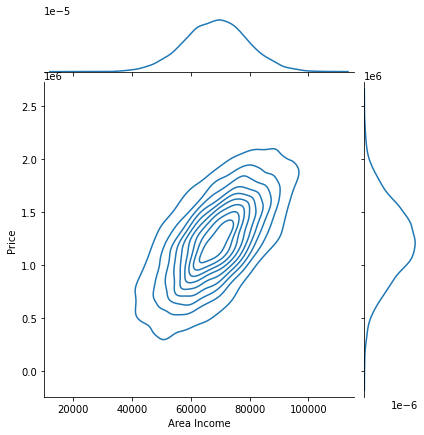

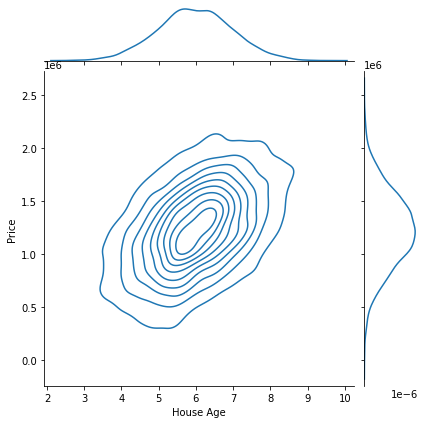

In [ ]:
plt.figure(figsize=(10,8))
sns.jointplot(x=df["Area Income"], y=df["Price"], kind="kde")
sns.jointplot(x=df["House Age"], y=df["Price"], kind="kde")

plt.show()

x,y split

In [ ]:
X = df.drop("Price", axis=1)
y = df["Price"]

One Hot Encoding

# Data Prepocessing


 mu = 1232072.65 and sigma = 353082.31



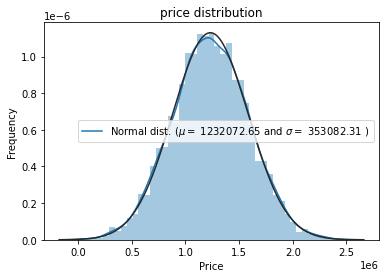

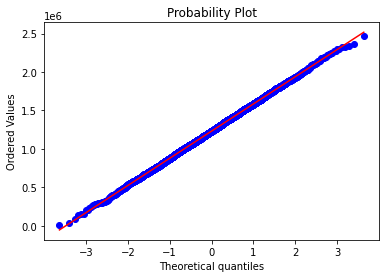

In [ ]:
sns.distplot(df['Price'], fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['Price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['Price'], plot=plt)
plt.show()

In [ ]:
#Converting objects labels into categorical
df[['Area Number of Rooms', 'Area Number of Bedrooms', 'Area Population']] = df[['Area Number of Rooms', 'Area Number of Bedrooms', 'Area Population']].astype('category')
df.dtypes

Area Income                 float64
House Age                   float64
Area Number of Rooms       category
Area Number of Bedrooms    category
Area Population            category
Price                       float64
Address                      object
dtype: object

In [ ]:
#Encode Data
from sklearn.preprocessing import OneHotEncoder
lst = ['Area Number of Rooms', 'Area Number of Bedrooms', 'Area Population']
ohe = OneHotEncoder()
ohe.fit(df[lst])
df_ohe_res = pd.DataFrame(ohe.transform(df[lst]).toarray(),
                          columns = ohe.get_feature_names_out())
df_fe = pd.concat([df, df_ohe_res], axis = 1)
df_fe.drop(columns=lst, inplace=True)
df_fe.head()

,Area Income,House Age,Price,Address,Area Number of Rooms_3.236194023,Area Number of Rooms_3.950224687,Area Number of Rooms_3.950972653,Area Number of Rooms_3.969631652,Area Number of Rooms_4.027930716,Area Number of Rooms_4.049320548,...,Area Population_66995.47405,Area Population_67353.9652,Area Population_67601.22356,Area Population_67701.6498,Area Population_67727.22905,Area Population_68311.69582,Area Population_69553.98833,Area Population_69575.44946,Area Population_69592.04024,Area Population_69621.71338
0,79545.45857,5.682861,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,79248.64245,6.002900,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,61287.06718,5.865890,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,63345.24005,7.188236,1.260617e+06,USS Barnett\nFPO AP 44820,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,59982.19723,5.040555,6.309435e+05,USNS Raymond\nFPO AE 09386,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X.head()

,Area Income,House Age,Area Number of Rooms,Area Number of Bedrooms,Area Population,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,USNS Raymond\nFPO AE 09386


Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

In [ ]:
# Splitting dataset into independent and dependent variable
X = df_fe.drop(columns='Price')
y = df_fe['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_train.shape)

(4000, 10258)
(4000,)
(1000, 10258)
(4000,)


In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits = 4, shuffle=True, random_state = 45)
    r2 = make_scorer(r2_score) 
    
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2) 
    score = [r2_val_score.mean()]
    return score

# Feature Engineering

In [ ]:
encoder = LabelEncoder()
a_clean['House Age'] = encoder.fit_transform(a_clean['House Age'])
model_mapping = {index : label for index, label in enumerate(encoder.classes_)}
model_mapping

{0: 2.644304186,
 1: 2.683042903,
 2: 2.797214954,
 3: 2.797619027,
 4: 2.922736153,
 5: 3.004716836,
 6: 3.055370327,
 7: 3.105751238,
 8: 3.1188017,
 9: 3.144894192,
 10: 3.205828407,
 11: 3.214868146,
 12: 3.23205949,
 13: 3.24171598,
 14: 3.278227596,
 15: 3.342599174,
 16: 3.386003829,
 17: 3.394290808,
 18: 3.395758659,
 19: 3.410785658,
 20: 3.412865926,
 21: 3.413044959,
 22: 3.430713498,
 23: 3.431500039,
 24: 3.438546514,
 25: 3.443457952,
 26: 3.446131154,
 27: 3.455060765,
 28: 3.479985415,
 29: 3.485869967,
 30: 3.49042996,
 31: 3.516437566,
 32: 3.518886315,
 33: 3.525267865,
 34: 3.533102865,
 35: 3.545706487,
 36: 3.55805376,
 37: 3.56367208,
 38: 3.571056075,
 39: 3.573485177,
 40: 3.594830126,
 41: 3.596318811,
 42: 3.606331313,
 43: 3.607404727,
 44: 3.613225369,
 45: 3.634897423,
 46: 3.639344477,
 47: 3.640221786,
 48: 3.644175062,
 49: 3.647654634,
 50: 3.648545707,
 51: 3.654666982,
 52: 3.664293785,
 53: 3.686286995,
 54: 3.690574063,
 55: 3.69089057,
 56: 3.696

In [ ]:
a_clean['Area Number of Rooms'] = encoder.fit_transform(a_clean['Area Number of Rooms'])
transmission_mapping = {index : label for index, label in enumerate(encoder.classes_)}
transmission_mapping

{0: 3.236194023,
 1: 3.950224687,
 2: 3.950972653,
 3: 3.969631652,
 4: 4.027930716,
 5: 4.049320548,
 6: 4.087718354,
 7: 4.12527809,
 8: 4.129733361,
 9: 4.147430722,
 10: 4.198676629,
 11: 4.209620425,
 12: 4.242191302,
 13: 4.290193826,
 14: 4.290699174,
 15: 4.29822055,
 16: 4.316259054,
 17: 4.321938664,
 18: 4.334884494,
 19: 4.347851966,
 20: 4.365670693,
 21: 4.377965509,
 22: 4.384628713,
 23: 4.393191978,
 24: 4.406835938,
 25: 4.407346082,
 26: 4.414380866,
 27: 4.415753056,
 28: 4.419215488,
 29: 4.425959447,
 30: 4.43037246,
 31: 4.43244788,
 32: 4.458940625,
 33: 4.46053037,
 34: 4.472098219,
 35: 4.474535672,
 36: 4.490071755,
 37: 4.491346745,
 38: 4.498698512,
 39: 4.499119974,
 40: 4.500165348,
 41: 4.513353831,
 42: 4.525421031,
 43: 4.541466869,
 44: 4.565155298,
 45: 4.580839921,
 46: 4.583646388,
 47: 4.583869961,
 48: 4.595996066,
 49: 4.608842675,
 50: 4.620870486,
 51: 4.621370129,
 52: 4.621620061,
 53: 4.626053733,
 54: 4.626558167,
 55: 4.630230328,
 56: 4.

In [ ]:
a_clean['Area Number of Bedrooms'] = encoder.fit_transform(a_clean['Area Number of Bedrooms'])
transmission_mapping = {index : label for index, label in enumerate(encoder.classes_)}
transmission_mapping

{0: 2.0,
 1: 2.01,
 2: 2.02,
 3: 2.03,
 4: 2.04,
 5: 2.05,
 6: 2.06,
 7: 2.07,
 8: 2.08,
 9: 2.09,
 10: 2.1,
 11: 2.11,
 12: 2.12,
 13: 2.13,
 14: 2.14,
 15: 2.15,
 16: 2.16,
 17: 2.17,
 18: 2.18,
 19: 2.19,
 20: 2.2,
 21: 2.21,
 22: 2.22,
 23: 2.23,
 24: 2.24,
 25: 2.25,
 26: 2.26,
 27: 2.27,
 28: 2.28,
 29: 2.29,
 30: 2.3,
 31: 2.31,
 32: 2.32,
 33: 2.33,
 34: 2.34,
 35: 2.35,
 36: 2.36,
 37: 2.37,
 38: 2.38,
 39: 2.39,
 40: 2.4,
 41: 2.41,
 42: 2.42,
 43: 2.43,
 44: 2.44,
 45: 2.45,
 46: 2.46,
 47: 2.47,
 48: 2.48,
 49: 2.49,
 50: 2.5,
 51: 3.0,
 52: 3.01,
 53: 3.02,
 54: 3.03,
 55: 3.04,
 56: 3.05,
 57: 3.06,
 58: 3.07,
 59: 3.08,
 60: 3.09,
 61: 3.1,
 62: 3.11,
 63: 3.12,
 64: 3.13,
 65: 3.14,
 66: 3.15,
 67: 3.16,
 68: 3.17,
 69: 3.18,
 70: 3.19,
 71: 3.2,
 72: 3.21,
 73: 3.22,
 74: 3.23,
 75: 3.24,
 76: 3.25,
 77: 3.26,
 78: 3.27,
 79: 3.28,
 80: 3.29,
 81: 3.3,
 82: 3.31,
 83: 3.32,
 84: 3.33,
 85: 3.34,
 86: 3.35,
 87: 3.36,
 88: 3.37,
 89: 3.38,
 90: 3.39,
 91: 3.4,
 92: 3.41

In [ ]:
a_clean['Area Population'] = encoder.fit_transform(a_clean['Area Population'])
transmission_mapping = {index : label for index, label in enumerate(encoder.classes_)}
transmission_mapping

{0: 172.6106863,
 1: 3285.450538,
 2: 3883.448164,
 3: 4114.489353,
 4: 5727.485885,
 5: 6248.75608,
 6: 6805.740783,
 7: 6821.950228,
 8: 7234.963521,
 9: 7360.295191,
 10: 7522.333138,
 11: 9193.833182,
 12: 9487.921585,
 13: 9579.071782,
 14: 9816.300885,
 15: 10311.00139,
 16: 10424.41625,
 17: 10504.32739,
 18: 10555.70282,
 19: 10704.82191,
 20: 10841.33307,
 21: 10951.34217,
 22: 11019.05378,
 23: 11037.38768,
 24: 11072.49853,
 25: 11511.38705,
 26: 11637.89291,
 27: 11792.81516,
 28: 11915.2811,
 29: 12113.11474,
 30: 12351.7196,
 31: 12450.57847,
 32: 12513.68173,
 33: 12906.25485,
 34: 12950.56691,
 35: 13008.4873,
 36: 13088.15636,
 37: 13108.01789,
 38: 13162.97966,
 39: 13328.75774,
 40: 13340.49243,
 41: 13345.56449,
 42: 13355.02004,
 43: 13385.42245,
 44: 13683.47964,
 45: 13704.35075,
 46: 13801.92076,
 47: 13889.07602,
 48: 13977.62978,
 49: 13981.43549,
 50: 13983.30125,
 51: 13998.57121,
 52: 14054.05343,
 53: 14226.93802,
 54: 14241.24877,
 55: 14291.15303,
 56: 1

In [ ]:
a_clean.head()

,Area Income,House Age,Area Number of Rooms,Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,1942,2512,111,468,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,2565,1972,60,3274,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,2298,4689,166,2642,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,4446,412,77,2122,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,854,3992,125,827,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
x = a_clean.drop('Price', axis = 1)
y = a_clean['Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Area Income              5000 non-null   float64 
 1   House Age                5000 non-null   float64 
 2   Area Number of Rooms     5000 non-null   category
 3   Area Number of Bedrooms  5000 non-null   category
 4   Area Population          5000 non-null   category
 5   Price                    5000 non-null   float64 
 6   Address                  5000 non-null   object  
dtypes: category(3), float64(3), object(1)
memory usage: 532.0+ KB


In [ ]:
df.isnull().sum()

Area Income                0
House Age                  0
Area Number of Rooms       0
Area Number of Bedrooms    0
Area Population            0
Price                      0
Address                    0
dtype: int64

Area Income                0
House Age                  0
Area Number of Rooms       0
Area Number of Bedrooms    0
Area Population            0
Price                      0
Address                    0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area Income,5000.0,6.858311e+04,10657.991214,17796.631190,61480.562390,6.880429e+04,7.578334e+04,1.077017e+05
House Age,5000.0,5.977222e+00,0.991456,2.644304,5.322283,5.970429e+00,6.650808e+00,9.519088e+00
Price,5000.0,1.232073e+06,353117.626584,15938.657920,997577.135075,1.232669e+06,1.471210e+06,2.469066e+06


In [ ]:
df.corr()

,Area Income,House Age,Price
Area Income,1.000000,-0.002007,0.639734
House Age,-0.002007,1.000000,0.452543
Price,0.639734,0.452543,1.000000


Splitting Data

In [ ]:
# memilih fitur yang akan dipakai
x = df[['Area Income','House Age']]
y = df['Price'] # harga rumah adalah target

In [ ]:
# data yang digunakan untuk training sebanyak 80% dan testing sebanyak 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Modelling

## Linear Regression

In [ ]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_pred,y_test))

271789.68802324455

In [ ]:
y_pred = regressor.predict(x_test)

In [ ]:
LinearRegressionModel = LinearRegression(fit_intercept = True, normalize = True, copy_X = True, n_jobs = -1)
LinearRegressionModel.fit(x_train, y_train)


print('Linear Regression Train Score is : ' , LinearRegressionModel.score(x_train, y_train))
print('Linear Regression Test Score is : ' , LinearRegressionModel.score(x_test, y_test))

print('----------------------------------------------------')
y_pred = LinearRegressionModel.predict(x_test)
print('Predicted Value for Linear Regression is : ' , y_pred[:10])

Linear Regression Train Score is :  0.6162023234134015
Linear Regression Test Score is :  0.611141617792019
----------------------------------------------------
Predicted Value for Linear Regression is :  [ 967707.75651562 1021184.63366309 1180173.60943329  854073.41355806
  822797.88268322 1149537.37606486  966811.71573943 1085563.14742736
 1509852.42168287 1548422.56353843]


In [ ]:
pricePredicted = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
pricePredicted = pricePredicted.reset_index()
pricePredicted.head(5)

,index,Actual Price,Predicted Price
0,398,894251.0686,9.677078e+05
1,3833,932979.3606,1.021185e+06
2,4836,920747.9113,1.180174e+06
3,4572,691854.9210,8.540734e+05
4,636,732733.2363,8.227979e+05


Ada perbedaan yang terlihat antara harga rumah aktual yang tercantum dan harga yang diprediksi oleh model Regresi Linier karena akurasi model hanya 61,1 %

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 210918.59810479588
Mean Squared Error: 73869634515.7726
Root Mean Squared Error: 271789.68802324455


## Random Forest

In [ ]:
RandomForestRegressorModel = RandomForestRegressor(n_estimators=100,max_depth=11, random_state=33)
RandomForestRegressorModel.fit(x_train, y_train)

print('Random Forest Regressor Train Score is : ' , RandomForestRegressorModel.score(x_train, y_train))
print('Random Forest Regressor Test Score is : ' , RandomForestRegressorModel.score(x_test, y_test))
print('Random Forest Regressor No. of features are : ' , RandomForestRegressorModel.n_features_)
print('----------------------------------------------------')

y_pred = RandomForestRegressorModel.predict(x_test)

Random Forest Regressor Train Score is :  0.8187687921384228
Random Forest Regressor Test Score is :  0.5685737531422684
Random Forest Regressor No. of features are :  2
----------------------------------------------------


In [ ]:
pricePredicted = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
pricePredicted = pricePredicted.reset_index()
pricePredicted.head(5)

,index,Actual Price,Predicted Price
0,398,894251.0686,1.044605e+06
1,3833,932979.3606,1.057336e+06
2,4836,920747.9113,1.102095e+06
3,4572,691854.9210,8.939113e+05
4,636,732733.2363,7.580767e+05


Ada perbedaan yang terlihat antara harga rumah aktual yang tercantum dan harga yang diprediksi oleh model regresi linear karena akurasi model hanya 56,8 %

In [ ]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 210918.59810479588
Mean Squared Error: 73869634515.7726
Root Mean Squared Error: 271789.68802324455


## Decision Tree Regressor

In [ ]:
DecisionTreeRegressorModel = DecisionTreeRegressor( max_depth=11,random_state=33)
DecisionTreeRegressorModel.fit(x_train, y_train)

print('DecisionTreeRegressor Train Score is : ' , DecisionTreeRegressorModel.score(x_train, y_train))
print('DecisionTreeRegressor Test Score is : ' , DecisionTreeRegressorModel.score(x_test, y_test))
print('----------------------------------------------------')
y_pred = DecisionTreeRegressorModel.predict(x_test)
print('Predicted Value for DecisionTreeRegressorModel is : ' , y_pred[:10])

DecisionTreeRegressor Train Score is :  0.8033688135401658
DecisionTreeRegressor Test Score is :  0.40234353450967963
----------------------------------------------------
Predicted Value for DecisionTreeRegressorModel is :  [ 988969.00073714 1005322.31530494 1245591.12214286  882170.3184
  728174.4427     1812960.408      1007116.2576     1053486.7445697
 1374887.9267619  1737206.44944444]


In [ ]:
pricePredicted = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
pricePredicted = pricePredicted.reset_index()
pricePredicted.head(5)

,index,Actual Price,Predicted Price
0,398,894251.0686,9.889690e+05
1,3833,932979.3606,1.005322e+06
2,4836,920747.9113,1.245591e+06
3,4572,691854.9210,8.821703e+05
4,636,732733.2363,7.281744e+05


Ada perbedaan yang terlihat antara harga rumah aktual yang tercantum dan harga yang diprediksi oleh model regresi linear karena akurasi model hanya 40,2 %

In [ ]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 210918.59810479588
Mean Squared Error: 73869634515.7726
Root Mean Squared Error: 271789.68802324455


untuk RMSE (Root Mean Squared Error) dari masing - masing model :
1. Linear Regression = 271789.68802324455
2. Random Forest = 271789.68802324455
3. Decision Tree = 271789.68802324455

